In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [44]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Passenger Id e dados duplicados

In [46]:
# PassengerId nao acrescenta informacoes ao nosso dataset
# portanto vamos dropa-la e checar para dados duplicados
def trataColunaPassengerId(df):
    df.drop(columns = ["PassengerId"], axis = 1, inplace=True)
    return 

trataColunaPassengerId(train_df)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Checar se ha duplicados
train_df.drop_duplicates(ignore_index=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Survived

In [48]:
# Checa se os valores estao conforme esperados
train_df["Survived"].unique()

array([0, 1])

## Pclass
Esse atributo representa a classe do tiquete do passageiro, com:
* 1 - Primeira classe;
* 2 - Segunda classe;
* 3 - Terceira classe. 


In [49]:
train_df["Pclass"].unique()

array([3, 1, 2])

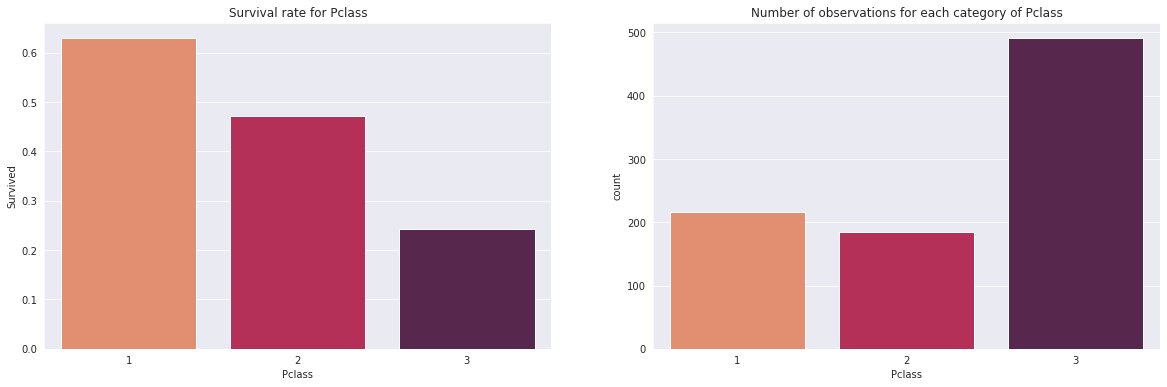

In [69]:
def grafico_de_barras_sobrevivencia(df, column, title = ""):
    """
    Funcao que plota um grafico para a taxa de sobrevivencia 
    de acordo com a coluna categorica passada
    """
    taxa_grupos = df.groupby(column)[["Survived"]].mean()
    
    fig, ax = plt.subplots(ncols = 2,figsize = (20,6)) 
    sns.barplot(x=taxa_grupos.index, y = taxa_grupos["Survived"], palette = "rocket_r", ax=ax[0], order = taxa_grupos.index.sort_values())
    sns.countplot(x=df[column], palette = "rocket_r", ax=ax[1], order = taxa_grupos.index.sort_values())
    ax[0].set_title("Survival rate for "+ column+title)
    ax[1].set_title("Number of observations for each category of "+ column+title)
    return 

grafico_de_barras_sobrevivencia(train_df, "Pclass")

Pode se notar que a classe do passageiro influe fortemente sobre a taxa de sobrevivencia. Isso acaba indicando que passageiros provenientes de maiores classes sociais foram privilegiados na hora do embarque

## Sex

In [61]:
# Analise simples
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

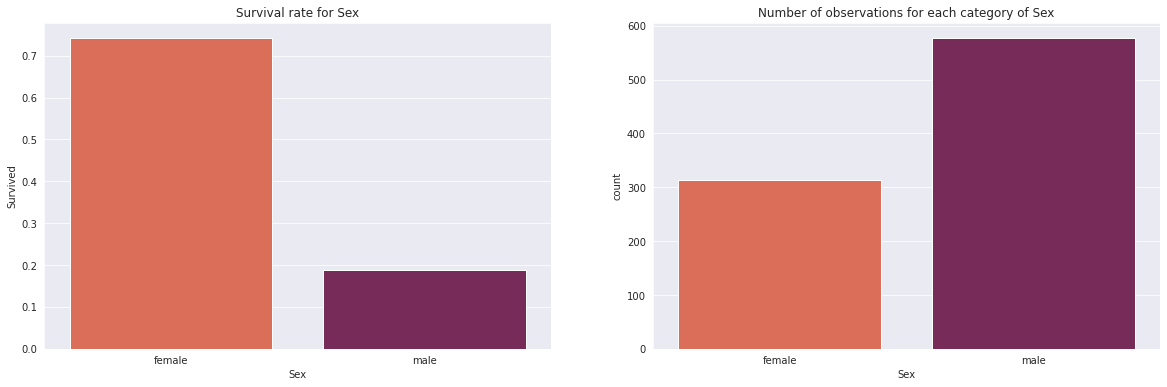

In [62]:
grafico_de_barras_sobrevivencia(train_df, "Sex")

Pode-se notar que as mulheres apresentaram uma maior taxa de sobrevivencia quando comparado aos homens. Isso indica que durante o embarque nos botes elas tinham preferencia.

## Age
Para o atributo da idade, ja foi possivel perceber que ele apresenta alguns valores nulos. Para isso vamos primeiro analisar a distribuicao dos valores nao nulos e substituir os valores nulos por uma distribuicao normal com media e variancia adequadas

In [63]:
train_df["Age"].describe()

count    891.000000
mean      29.960049
std       14.287213
min        0.000000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [64]:
def trataColunaAge(train, test = None,  is_test = False):
    """
    Função que realiza o tratamento dos dados para a coluna Age,

    """
    return_df = None
    
    mean_age = train["Age"].mean()
    std_age  = train["Age"].std()

    if(is_test):
        test_age_nan = test[test["Age"].isna()]["Age"]
        n = test_age_nan.size
        age_missing_values = np.random.normal(mean_age, std_age, n)
        age_missing_values[age_missing_values < 0] = 0
        test.loc[test["Age"].isna(), "Age"] = age_missing_values
        return_df = test
    else:
        train_age_nan = train[train["Age"].isna()]["Age"]
        n = train_age_nan.size
        age_missing_values = np.random.normal(mean_age, std_age, n)
        age_missing_values[age_missing_values < 0] = 0
        train.loc[train["Age"].isna(), "Age"] = age_missing_values
        return_df = train

    return return_df

# Replace NaNs in Age with a normal distribution
train_df = trataColunaAge(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


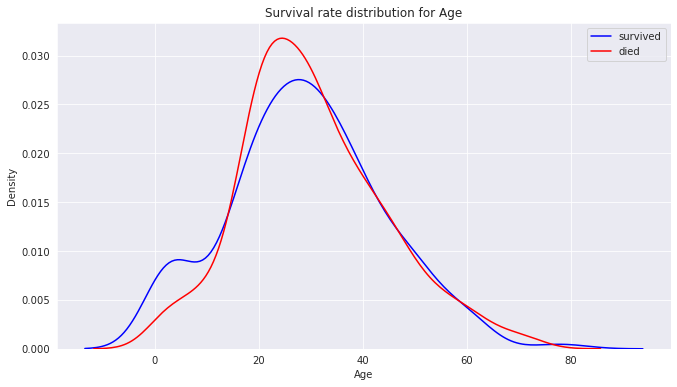

In [65]:
def displot_sobrevivencia(df, column):
    """
    Funcao que plota um grafico para a distribuicao da
    taxa de sobrevivencia de acordo com a coluna numerica passada
    """
    fig, ax = plt.subplots(figsize = (11,6))
    
    sns.kdeplot(data = df[df["Survived"]==1], x=column, ax = ax, label = "survived", color = "blue")
    sns.kdeplot(data = df[df["Survived"]==0], x=column, ax = ax, label = "died", color = "red")
    ax.legend()
    
    ax.set_title("Survival rate distribution for "+ column)
    return 
displot_sobrevivencia(train_df, "Age")

Percebe-se que a distribuicao das idades para os sobreviventes apresenta uma maior concentracao para a idade de criancas, demonstrando que houve uma certa preferencia para esse grupo no embarque. 

## SibSp
Essa coluna indica a quantidade de Siblings (irmaos ou irmas) e Spouse (marido ou esposa) que a pessoas possui e que também estavam a bordo do navio 

In [66]:
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

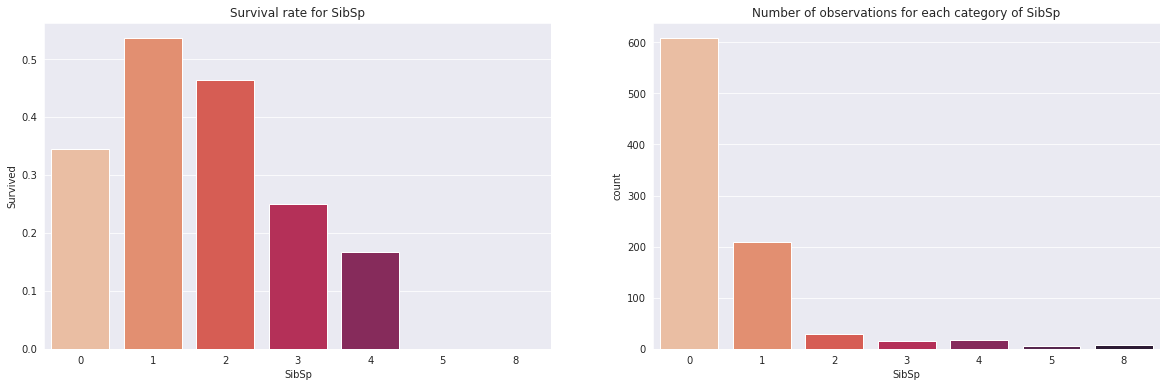

In [67]:
grafico_de_barras_sobrevivencia(train_df, "SibSp")

A partir do gráfico, percebe-se que a maioria das pessoas apresenta SibSp de 0 ou 1. Para os demais valores de SibSp há poucas observações, o que não nos permite concluir muito sobre. Para entender melhor o gráfico acima, vamos ver qual a influência da "coluna" Sex na taxa de sobrevivência de cada grupo 

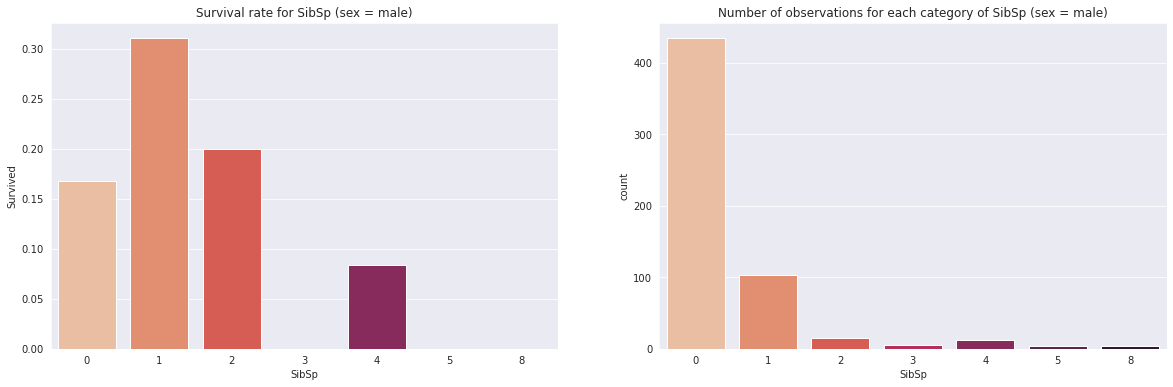

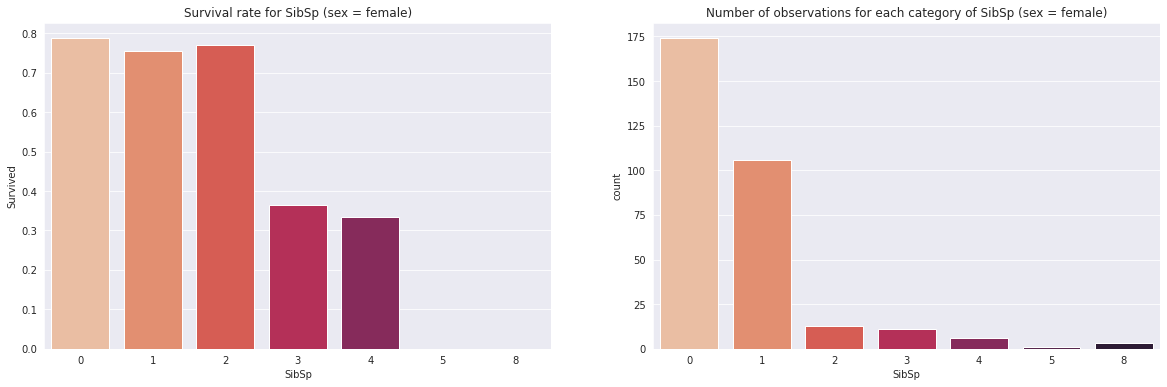

In [70]:
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "male"], "SibSp", title = " (sex = male)")
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "female"], "SibSp", title = " (sex = female)")

Desses gráficos pode-se notar que para os homens, apresentar um SibSp de 1 aumentou consideravelmente a taxa de sobrevivência, enquanto que para as mulheres, não houve muita alteração para a taxa de sobrevivência em função desse valor(os valores obtidos para as categorias 2, 3, 4, 5 e 8 podem ser desconsiderados pois há poucas observações).

In [27]:
train_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

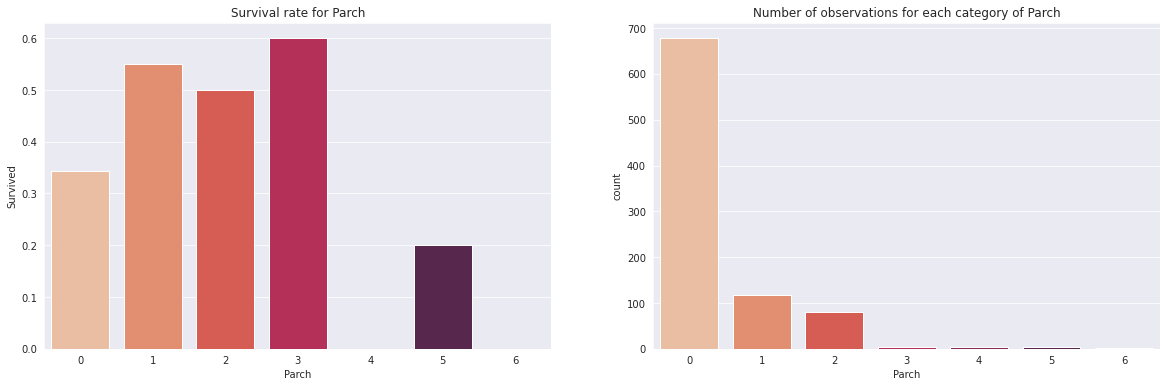

In [71]:
grafico_de_barras_sobrevivencia(train_df, "Parch")

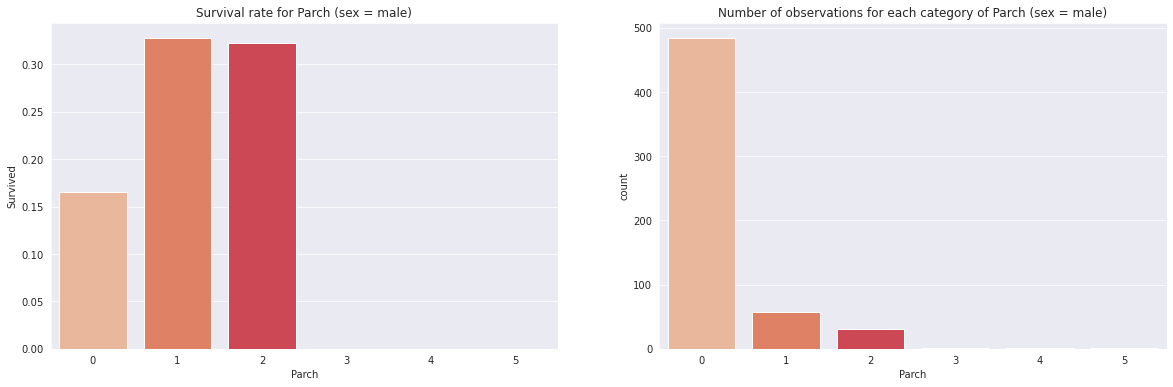

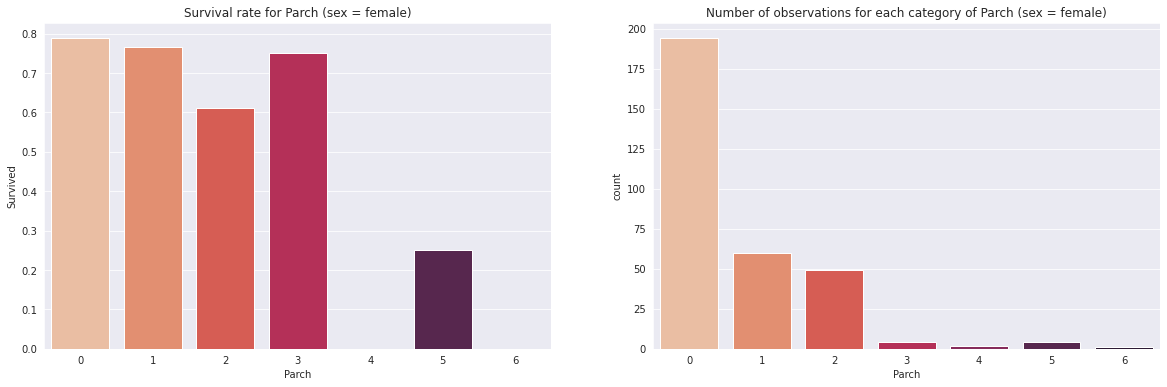

In [72]:
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "male"], "Parch", title = " (sex = male)")
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "female"], "Parch", title = " (sex = female)")

In [28]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [29]:
train_df["Cabin"].head(20)

PassengerId
1      NaN
2      C85
3      NaN
4     C123
5      NaN
6      NaN
7      E46
8      NaN
9      NaN
10     NaN
11      G6
12    C103
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
Name: Cabin, dtype: object